In [ ]:
# Esercizio numero 1
# Un'urna A continene n palline tutte rosse. Un'urna B contiene n palline di cui r rosse (1<=r<=n) e n-r nere.
# Si sceglie a caso una delle due urne e da essa si effettua una successione di estazioni con rimpiazzo. 
# 1) Qual è la probabilità che la prima pallina estratta sia rossa?
# 2) Qual è la probabilità che le prime due palline estratte siano di colori diversi? 
# 3) Quante estrazione sono necessarie in media per veder comparire per la prima volta una pallina rossa? 
# 4) Sapendo che le prime k palline estratte sono rosse, qual è la probabilità che l'urna dalla quale esse sono sttate estratte sia l'urna A? 
#    Supponiamo n = 12 e r = 4, quanto grande dovrà esser k perchè si possa concludere che l'urna da cui le palline sono state estratte sua l'urna A
#    con una probabilità di almeno 99%?

1) Ipotizziamo che l'urna venga scelta a caso e quindi ci sia il 50 percento di probabilità di sceglierla (1/2)

P(A) = 1/2
P(B) = 1/2 * r/n 
P(A) U P(B) = P(A) + P(B) - P(A ∩ B) = 1/2 + (1/2 *r/n) 

2) Indichiamo con C l'evento "le prime due estrazioni danno palline di colori diversi"
P(C|A) = 0
P(C|B) = B(2, r/n) Dunque 

p = r/n 

P(C|B) = (2
          1 )*p*(1-p)

3) Indichiamo con T la v.a. "tempo d'attesa della prima estrazione di una pallina rossa" e segue una distribuzione ipergeometrica 
P(T = k) = P(T = k|A)P(A) + P(T = k|B)P(B)
Visto che l'urna A contiene solo palline rosse
P(T = k|A) = {1 se k = 1  o 0 altrimenti }
mentre 
P(T = k|B) = {p(1-p) elevato a k-1 se k = 1,2 0 altrimenti}

E[T] = 1/2(1 + n/r) 

4) Poniamo E come l'evento che le prime k estrazioni hanno dato tutte palline rosse. La probabilità sarà P(A|E) e per la formula di Bayes: 
P(A|E) = P(E|A)P(A) / P(E)
Ora P(E|A) = 1 mentre P(A) = 1/2
Calcoliamo P(E) e lo facciamo usando il Teorema delle probabilita totali 
P(E) = P(E|A)P(A) + P(E|B)P(B)
B(k, r/n). Dunque r/n elevato a k 
P(E) = 1/2(1 + (r/n)^k) 

Per n = 12, r= 4 applico la formula e la pongo maggiore a 0.99

In [ ]:
#Nella tabella che segue si riporta il peso (in mg) del principio attivo misurato in un campione di 10 compresse 
#estratto da un lotto di produzione di una nota marca farmaceutica.
#4.65 4.7 4.75 4.77 4.8 4.95 5 4.75 4.54 4.66

#Supponendo che questo campione sia estratto da un lotto avente popolazione distribuita secondo una 
#normale di parametri incogniti si svolgano i seguenti quesiti.
#a) Si calcoli la media campionaria, la deviazione standard e l’intervallo di confidenza con livello di fiducia 0.01.
#b) Si rappresentino i dati mediante box-plot e si commenti il grafico.
#c) Se il principio attivo presente nella compressa deve essere pari a 4.7 mg, possiamo dire con un livello di fiducia 0.05 che il lotto di produzione rientra in questa specifica?

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 


In [2]:
#Array
X = np.array([4.65, 4.7, 4.75, 4.77, 4.8, 4.95, 5, 4.75, 4.54, 4.66])
#Media campionaria
media = np.mean(X)
print("Media campionaria: ", media )

Media campionaria:  4.757000000000001


In [3]:
#Deviazione Standard
deviazione = np.std(X)
print("Deviazione Standard: ", deviazione)

Deviazione Standard:  0.13023440405668538


4.623159635288149

4.890840364711852

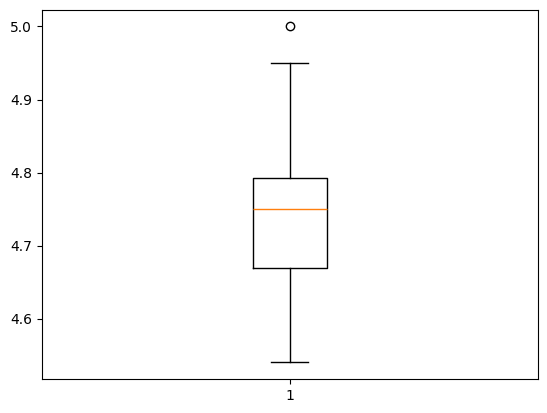

In [8]:
#Intervallo di confidenza al 95% 
from scipy.stats import t 
#alpha è il mio intervallo di confidenza
#INTERVALLO DI CONFIDENZA AL 95%
#[media - deviazione/ radice di n * t_alpha, media + deviazione/ radice di n * t_alpha]
n = X.size
df = n-1 
alpha = 0.01
t_alpha = t.ppf(1.-alpha/2., df)
Il = media - deviazione/np.sqrt(n)*t_alpha
Ir = media + deviazione/np.sqrt(n)*t_alpha
display(Il, Ir)

#Box-plot
plt.boxplot(X)
plt.show()

In [10]:
#Calcoliamo una statistica t per il campione singolo e misura quanti errori la media del campione si discosta dalla media della popolazione

media_0 = 4.7

T_0 = (media - media_0)/deviazione*np.sqrt(n)
display(T_0)

alpha = 0.05 #95 %
T = t.ppf(1.-alpha, n-1)
display(T)


1.3840415513487814

1.8331129326536333

Visto che T_0 è minore di T non possiamo rigettare l'ipotesi nulla
Significa che non ci sono differenze signficiative tra la media del campione
e la media della popolazione specificata 


La seguente tabella raccoglie i dati relativi alle temperature medie invernali registrate negli ultimi 10 anni in 
una città italiana
Anno 2010 2011 2012 2013 2014 2015 2016 2017
Temperatura 10 11 10.5 12 10 12 11 13

Si svolgano i seguenti quesiti.
a) Si determinino i coefficienti della retta di regressione e i loro intervalli di confidenza al 95%.
b) Si rappresentino i dati e la retta di regressione in uno stesso grafico.
c) Si determini il coefficiente di Pearson.
d) Si determini il valore della temperatura previsto per l’anno 2022 e il suo intervallo di confidenza al 
95%
